C:\Users\swath\AppData\Local\Temp\ipykernel_19928\1801112491.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


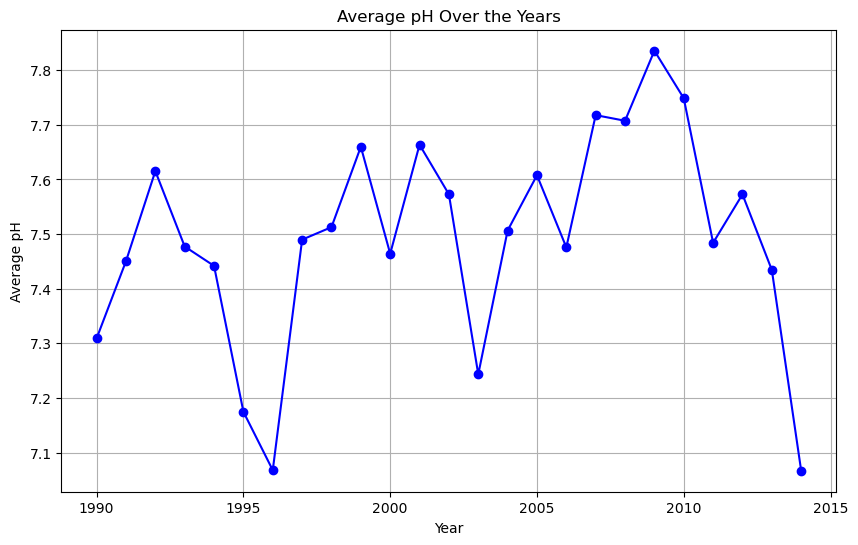

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'Combined_Less.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in 'PHSTVL' and 'YEAR' columns
data_clean = data.dropna(subset=['PHSTVL', 'YEAR'])

# Group by 'YEAR' and calculate the mean pH for each year
yearly_ph = data_clean.groupby('YEAR')['PHSTVL'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_ph.index, yearly_ph.values, marker='o', linestyle='-', color='b')
plt.title('Average pH Over the Years')
plt.xlabel('Year')
plt.ylabel('Average pH')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd

# Load the dataset (replace with the correct path to your dataset file)
dataset_path = 'Combined_Less.csv'  # Replace with the actual path to your file
data = pd.read_csv(dataset_path)

# Extract the relevant columns (Year and PHSTVL for pH levels)
data_for_corr = data[['YEAR', 'PHSTVL']].dropna()

# Calculate the Pearson correlation coefficient between Year and PHSTVL (pH levels)
pearson_corr = data_for_corr['YEAR'].corr(data_for_corr['PHSTVL'])

# Print the single Pearson correlation coefficient value
print("Pearson Correlation Coefficient between Year and PHSTVL:", pearson_corr)


Pearson Correlation Coefficient between Year and PHSTVL: 0.10532828428165869


C:\Users\swath\AppData\Local\Temp\ipykernel_19928\3823142133.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


C:\Users\swath\AppData\Local\Temp\ipykernel_19928\4075294298.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


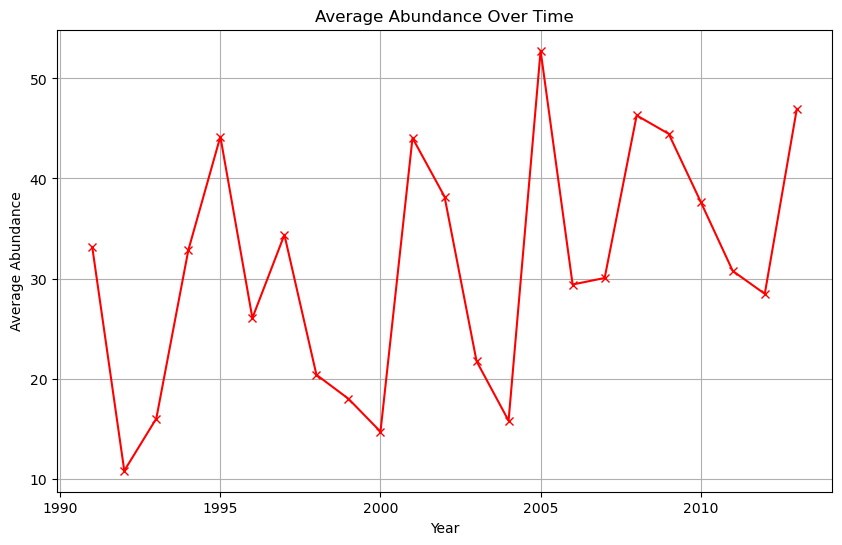

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'Combined_Less.csv'
data = pd.read_csv(file_path)

# Extract relevant columns (species, year, and abundance)
species_data = data[['species', 'YEAR', 'ABUND']].dropna()

# Group by year and calculate the average abundance for each year
yearly_abundance = species_data.groupby('YEAR')['ABUND'].mean().reset_index()

# Plot the abundance over time
plt.figure(figsize=(10, 6))

# Plotting abundance values over time
plt.plot(yearly_abundance['YEAR'], yearly_abundance['ABUND'], label='Average Abundance', color='red', marker='x')

# Adding labels and title
plt.title('Average Abundance Over Time')
plt.xlabel('Year')
plt.ylabel('Average Abundance')
plt.grid(True)

# Show the plot
plt.show()


In [31]:
import pandas as pd


dataset_path = 'Combined_Less.csv'  # Replace with the actual path to your file
data = pd.read_csv(dataset_path)

# Extract the relevant columns (Year and ABUND for species abundance)
data_for_corr_abundance = data[['YEAR', 'ABUND']].dropna()

# Calculate the Pearson correlation coefficient between Year and ABUND (species abundance)
pearson_corr_abundance = data_for_corr_abundance['YEAR'].corr(data_for_corr_abundance['ABUND'])

# Print the single Pearson correlation coefficient value
print("Pearson Correlation Coefficient between Year and Abundance:", pearson_corr_abundance)


Pearson Correlation Coefficient between Year and Abundance: 0.05006567703307435


C:\Users\swath\AppData\Local\Temp\ipykernel_19928\3545644228.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


C:\Users\swath\AppData\Local\Temp\ipykernel_19928\2614064072.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Combined_Less.csv', dtype={'ColumnName': float})
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown

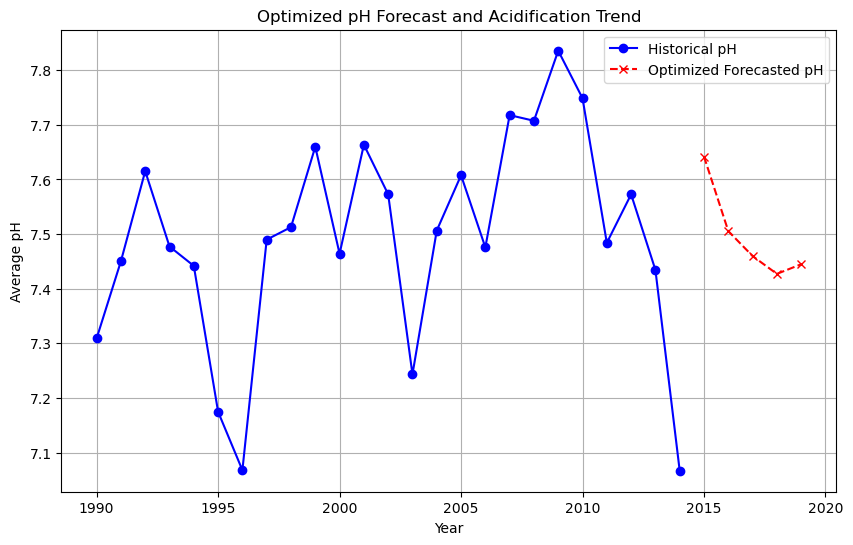

Best MSE: 0.0334921430848108
Best MAE: 0.12527069690187567
Best R²: 0.33482881954237553


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



data = pd.read_csv('Combined_Less.csv', dtype={'ColumnName': float})


# Group the data by year and calculate the average pH for each year
yearly_data = data.groupby('YEAR')['PHSTVL'].mean().reset_index()

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(yearly_data) * 0.8)
train, test = yearly_data[:train_size], yearly_data[train_size:]

# Define a range of possible values for p, d, q
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Create all combinations of (p, d, q)
param_combinations = list(product(p_values, d_values, q_values))

# Initialize variables to track the best model
best_mse = float('inf')
best_mae = float('inf')
best_r2 = float('-inf')
best_order = None
best_model = None

# Try each combination of (p, d, q)
for order in param_combinations:
    try:
        # Fit ARIMA model
        model = ARIMA(train['PHSTVL'], order=order)
        model_fit = model.fit()

        # Predict on the test set
        test_predictions = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

        # Calculate MSE, MAE, and R²
        mse = mean_squared_error(test['PHSTVL'], test_predictions)
        mae = mean_absolute_error(test['PHSTVL'], test_predictions)
        r2 = r2_score(test['PHSTVL'], test_predictions)

        # Update best model if the current one is better
        if mse < best_mse:
            best_mse = mse
            best_mae = mae
            best_r2 = r2
            best_order = order
            best_model = model_fit

    except Exception as e:
        continue  # Skip models that raise errors

# Plot the historical pH and the optimized forecasted pH using the best model
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['YEAR'], yearly_data['PHSTVL'], label='Historical pH', color='blue', marker='o')

# Forecast future years using the best model
forecast_steps = 5
forecast_index = range(yearly_data['YEAR'].max() + 1, yearly_data['YEAR'].max() + forecast_steps + 1)
forecast_values = best_model.forecast(steps=forecast_steps)

# Plot the forecasted pH values
plt.plot(forecast_index, forecast_values, label='Optimized Forecasted pH', color='red', linestyle='--', marker='x')

# Adding labels and title
plt.title('Optimized pH Forecast and Acidification Trend')
plt.xlabel('Year')
plt.ylabel('Average pH')
plt.legend()
plt.grid(True)
plt.show()

# Output the best model parameters and performance metrics

print(f"Best MSE: {best_mse}")
print(f"Best MAE: {best_mae}")
print(f"Best R²: {best_r2}")
